In [8]:
%matplotlib inline

import xgboost as xgb
import common

import evaluate

In [36]:
train_data = "C:\\programming\\betting\\output\\nba\\train\\train.csv"
test_data = "C:\\programming\\betting\\output\\nba\\test\\train.csv"

In [37]:
X, y = common.read_data_from_file(train_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])
X_test, y_test = common.read_data_from_file(test_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test, label=y_test)

In [38]:
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [39]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [40]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.64046	train-auc:0.65804
[1]	eval-auc:0.654671	train-auc:0.687408
[2]	eval-auc:0.659579	train-auc:0.701019
[3]	eval-auc:0.657396	train-auc:0.706425
[4]	eval-auc:0.666529	train-auc:0.716821
[5]	eval-auc:0.658297	train-auc:0.724234
[6]	eval-auc:0.659428	train-auc:0.731502
[7]	eval-auc:0.649589	train-auc:0.738575
[8]	eval-auc:0.647481	train-auc:0.742226
[9]	eval-auc:0.644124	train-auc:0.74955


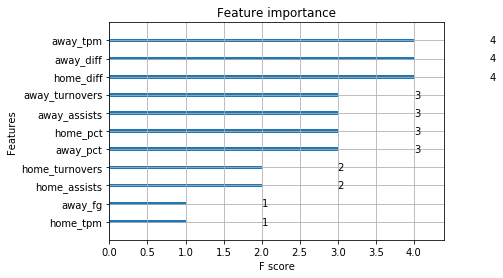

In [41]:
xgb.plot_importance(bst)

In [11]:
evaluate.evaluate("rs", bst, X_test, y_test)

AttributeError: 'DataFrame' object has no attribute 'feature_names'